In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


In [3]:
# Load the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the pixel values to the range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0


In [4]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the input images
    keras.layers.Dense(128, activation='relu'),  # First hidden layer with ReLU activation
    keras.layers.Dropout(0.2),                   # Dropout layer to reduce overfitting
    keras.layers.Dense(10, activation='softmax') # Output layer with softmax activation
])


In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
model.fit(train_images, train_labels, epochs=5)  # You can adjust the number of epochs


Epoch 1/5
1875/1875 [==============================] - 17s 8ms/step - loss: 0.2950 - accuracy: 0.9137
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1422 - accuracy: 0.9582
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1093 - accuracy: 0.9680
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0902 - accuracy: 0.9727
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0750 - accuracy: 0.9760


In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")


313/313 [==============================] - 1s 4ms/step - loss: 0.0693 - accuracy: 0.9780
Test accuracy: 0.9779999852180481


1/1 [==============================] - 0s 44ms/step
Predicted digit: 5


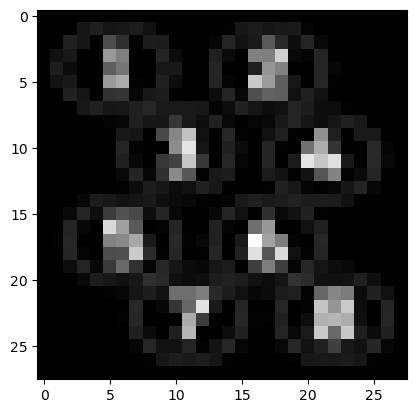

In [16]:
from PIL import Image

# Load your scanned image
scanned_image = Image.open("C:/Users/hp/OneDrive/Pictures/scannedimage.png")

# Preprocess the image (resize and normalize)
scanned_image = scanned_image.resize((28, 28))
scanned_image = np.array(scanned_image) / 255.0

# Make a prediction
predictions = model.predict(np.expand_dims(scanned_image, axis=0))
predicted_digit = np.argmax(predictions)

# Display the predicted digit
print(f"Predicted digit: {predicted_digit}")

# Display the scanned image
plt.imshow(scanned_image, cmap=plt.cm.binary)
plt.show()


1/1 [==============================] - 0s 45ms/step
Predicted digit: 5


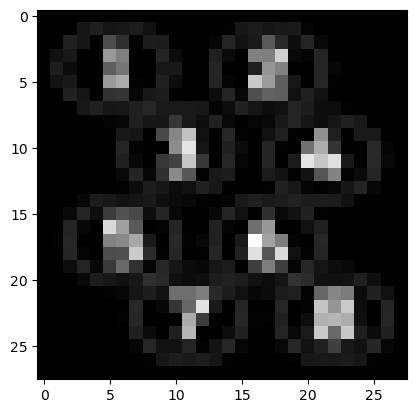

In [15]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load your scanned image
scanned_image = Image.open("C:/Users/hp/OneDrive/Pictures/scannedimage.png")

# Convert the image to grayscale
scanned_image = scanned_image.convert("L")

# Preprocess the image (resize and normalize)
scanned_image = scanned_image.resize((28, 28))
scanned_image = np.array(scanned_image) / 255.0

# Make a prediction
predictions = model.predict(np.expand_dims(scanned_image, axis=0))
predicted_digit = np.argmax(predictions)

# Display the predicted digit
print(f"Predicted digit: {predicted_digit}")

# Display the scanned image
plt.imshow(scanned_image, cmap=plt.cm.binary)
plt.show()
